standford robot PATH CALCULATOR

[[0.         0.         0.        ]
 [1.         1.         1.        ]
 [1.16618076 1.16618076 1.16618076]
 [1.59475219 1.59475219 1.59475219]
 [2.18075802 2.18075802 2.18075802]
 [2.81924198 2.81924198 2.81924198]
 [3.40524781 3.40524781 3.40524781]
 [3.83381924 3.83381924 3.83381924]
 [4.         4.         4.        ]]
[[ 0.          0.          0.        ]
 [-0.1637459   0.67474094  2.        ]
 [ 0.6424904   0.5843739   1.        ]
 [ 0.65874639  0.51530277  0.83381924]
 [ 0.63623502  0.61126651  0.40524781]
 [ 0.47257178  1.48927457 -0.18075802]
 [ 0.73894073  0.18623433 -0.81924198]
 [ 0.60972479  0.72758217 -1.40524781]
 [ 0.60245313  0.76026321 -1.83381924]
 [ 0.60116773  0.76608005 -2.        ]]


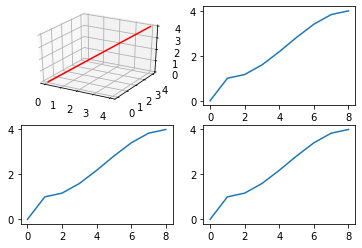

In [ ]:
'''x(t) = ax0 + ax1t + ax2t^2 + ax3t^3
y(t) = ay0 + ay1t + ay2t^2 + ay3t^3
z(t) = az0 + az1t + az2t^2 + az3t^3
dot.x(t) =  ax1 + 2*ax2t + 3*ax3t^2
dot.y(t) =  ay1 + 2*ay2t + 3*ay3t^2
dot.z(t) =  az1 + 2*az2t + 3*az3t^2

p(0) = p0
p(tf ) = pf
˙p(0) = 0
˙p(tf )=0'''
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
ini=np.array([1,1,1])
f=np.array([3,3,3])
tf=7
ax0=ini[0]
ay0=ini[1]
az0=ini[2]
ax1=0
ay1=0
az1=0
'''
ax2*tf**2 + ax3*tf**3=f[0]
ay2*tf**2 + ay3*tf**3=f[1]
az2*tf**2 + az3*tf**3=f[2]
2*ax2*tf + 3*ax3*tf**2=0
2*ay2*tf + 3*ay3*tf**2=0
2*az2*tf + 3*az3*tf**2=0'''
#X=np.array([ax2,ax3,ay2,ay3,az2,az3])
A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
K=np.array([f[0],f[1],f[2],0,0,0])
invA=np.linalg.inv(A)
X=invA@K

ax2=X[0]
ax3=X[1]
ay2=X[2]
ay3=X[3]
az2=X[4]
az3=X[5]
Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
arr = np.array([[1,2,3],[4,5,6]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t,t**2,t**3])

    
    row=Aa@T

    arr = np.vstack([arr,row])

  return arr

arr = np.array([[0,0,0]])
arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory
print(arr1)

#inverse kinematics

def invkine(arr1,J):
  for i in range(len(arr1)):
    x=[0]*3;
    x=arr1[i];
    offset=2;
    d1=3;
    d2=1;
    r = abs((x[0]**2+x[1]**2-d1**2-d2**2)/(2*d1*d2))
    theta2 = np.arctan2(np.sqrt(abs(1-r**2)),r)
    theta1 = np.arctan2(x[1],x[0]) - np.arctan2((d2*np.sin(theta2)),(d1+d2*np.cos(theta2)))
    d3 =offset-x[2]
    s=np.array([theta1,theta2,d3])
    J=np.vstack([J,s])
  return J

    
J=np.array([[0,0,0]])
arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
print(arr2)
fig=plt.figure()
ax=fig.add_subplot(2,2,1,projection='3d')
X=[[s[0] for s in arr1 ],[s[1] for s in arr1 ],[s[2] for s in arr1 ]]
ax.plot3D(X[0],X[1],X[2],'r')

t=[s for s in range(len(X[0]))]
for i in range(3):
  ax=fig.add_subplot(2,2,i+2)
  ax.plot(t,X[i])


plt.show()


The 3D is the xyz PLOT and others are X,y,z vs t plot respectively

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1



sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F,mG,l1,l2 = sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([q1dot,q2dot,d4dot])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);

A1=sym.Matrix([[sym.cos(q1),0,-sym.sin(q1),0],[sym.sin(q1),0,sym.cos(q1),0],[0,-1,0,l1],[0,0,0,1]]);
A2=sym.Matrix([[sym.cos(q2),0,sym.sin(q2),0],[sym.sin(q2),0,-sym.cos(q2),0],[0,1,0,l2],[0,0,0,1]]);
A3=sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d4],[0,0,0,1]]);

A=sym.simplify(A1*A2*A3)
A.subs({q1:Q1n[0], q2:Q2n[0],d4:D4n[0],l2:25,l1:25})


#sym.simplify(Z1.cross(O3)),sym.simplify(Z2)


⎡0.688074911033054   -0.612126028303337  0.389685311861297  -14.9782235970081⎤
⎢                                                                            ⎥
⎢0.532637519988467   0.790760219961514   0.301654681427213  20.0205309762479 ⎥
⎢                                                                            ⎥
⎢-0.492798324984359          0           0.870143557634377  25.7255424399176 ⎥
⎢                                                                            ⎥
⎣        0                   0                   0                  1        ⎦

In [ ]:

sym.simplify(A1*A2)

⎡cos(q₁)⋅cos(q₂)  -sin(q₁)  sin(q₂)⋅cos(q₁)  -l₂⋅sin(q₁)⎤
⎢                                                       ⎥
⎢sin(q₁)⋅cos(q₂)  cos(q₁)   sin(q₁)⋅sin(q₂)  l₂⋅cos(q₁) ⎥
⎢                                                       ⎥
⎢   -sin(q₂)         0          cos(q₂)          l₁     ⎥
⎢                                                       ⎥
⎣       0            0             0              1     ⎦

In [ ]:

sym.simplify(A1)

⎡cos(q₁)  0   -sin(q₁)  0 ⎤
⎢                         ⎥
⎢sin(q₁)  0   cos(q₁)   0 ⎥
⎢                         ⎥
⎢   0     -1     0      l₁⎥
⎢                         ⎥
⎣   0     0      0      1 ⎦

here we calculated Z0 Z1 Z2 O3,O2,O1,O0

NOW WE CALCULATE THE SYMBOLIC JACOBIAN

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1



sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F,mG,l1,l2 = sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([q1dot,q2dot,d4dot])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);

Z0=sym.Matrix([[0],[0],[1]]);
Z1=sym.Matrix([[-sym.sin(q1)],[sym.cos(q1)],[0]]);
Z2=sym.Matrix([[sym.cos(q1)*sym.sin(q2)],[sym.sin(q1)*sym.sin(q2)],[sym.cos(q2)]]);
O3=sym.Matrix([[sym.cos(q1)*sym.sin(q2)*d4-sym.sin(q1)*l2],[sym.sin(q1)*sym.sin(q2)*d4+sym.cos(q1)*l2],[sym.cos(q2)*d4+l1]])
O2=sym.Matrix([[sym.sin(q2)*sym.cos(q1)],[sym.sin(q1)*sym.sin(q2)],[sym.cos(q2)]])
O1=sym.Matrix([[-l2*sym.sin(q1)],[l2*sym.cos(q1)],[l1]])

O0=sym.Matrix([[0],[0],[0]])

sym.simplify(Z0.cross(O3-O0)),sym.simplify(Z1.cross(O3-O1)),sym.simplify(Z2)

#DQ=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)

⎛⎡-d₄⋅sin(q₁)⋅sin(q₂) - l₂⋅cos(q₁)⎤  ⎡d₄⋅cos(q₁)⋅cos(q₂)⎤  ⎡sin(q₂)⋅cos(q₁)⎤⎞
⎜⎢                                ⎥  ⎢                  ⎥  ⎢               ⎥⎟
⎜⎢d₄⋅sin(q₂)⋅cos(q₁) - l₂⋅sin(q₁) ⎥, ⎢d₄⋅sin(q₁)⋅cos(q₂)⎥, ⎢sin(q₁)⋅sin(q₂)⎥⎟
⎜⎢                                ⎥  ⎢                  ⎥  ⎢               ⎥⎟
⎝⎣               0                ⎦  ⎣   -d₄⋅sin(q₂)    ⎦  ⎣    cos(q₂)    ⎦⎠

AFTER CALCULATING JACOBIAN WE CALCULATE THE KINETIC + ROTATIONAL ENERGY AND HENCE THE DQ AND CQ matrix and GQ matrix

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

m1g=1
m2g=1
m3g=1
i1=1
i2=1
GR=9.8
m4=1
l1=25
l2=25
#I1 0
#0 I2

sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F,mG= sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG ')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([q1dot,q2dot,d4dot])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])

VQ=m1g*l1/2+m2g*(l1+l2/2)*sym.sin(q1)+m3g*(l1+l2/2+d4/2)*sym.sin(q1)
X1=sym.diff(VQ,q1)
X2=sym.diff(VQ,q2)
X3=sym.diff(VQ,d4)
GQ=sym.Matrix([X1,X2,X3])

tau=sym.Matrix([T1,T2,F])
#FOR KINETIC ENERGY CALCULATION
M=sym.Matrix([[-l2*sym.cos(q1),l1*sym.cos(q1),0],[-l2*sym.sin(q1),l1*sym.sin(q1),0],[0,0,1]]);
X=M.T
N=sym.Matrix([[-l2*sym.cos(q1),l1*sym.cos(q1),sym.sin(q2)*sym.cos(q1)],[-l2*sym.sin(q1),l1*sym.sin(q1),sym.sin(q1)*sym.sin(q2)],[0,0,sym.cos(q2)]]);
Y=N.T
O=sym.Matrix([[-d4*sym.sin(q1)*sym.sin(q2)-l2*sym.cos(q1),(d4*sym.cos(q2)+l1)*sym.cos(q1),sym.sin(q2)*sym.cos(q1)],[d4*sym.sin(q1)*sym.cos(q2)-l2*sym.sin(q1),(d4*sym.cos(q2)+l1)*sym.sin(q1),sym.sin(q1)*sym.sin(q2)],[0,-d4*sym.sin(q2),sym.cos(q2)]]);
Z=O.T
I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,0]])
#FOR ROTATIONAL ENERGY CALCULATION
M1=sym.Matrix([[-sym.sin(q1),0,0],[sym.cos(q1),0,0],[0,1,0]]);
X1=M1.T
N1=sym.Matrix([[-sym.sin(q1),sym.cos(q1)*sym.sin(q2),0],[sym.cos(q1),sym.sin(q1)*sym.sin(q2),0],[0,sym.cos(q2),0]]);
Y1=N1.T


DQ0=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)
DQ1=(sym.simplify(X1*M1)+sym.simplify(Y1*N1))*I
DQ=DQ0+DQ1


no1=3

CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=(0.5*(sym.diff(DQ[k,j],k1[i]) + sym.diff(DQ[k,i],k1[j])-sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        

difF=DQ.inv()*(CQQD*(k2)+GQ-tau)
difF

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                             ────────────────
⎢                                                               4    2        
⎢                                                             d₄ ⋅sin (q₁)⋅sin
⎢                                                                             
⎢                                                         ⎛        ⎛   ⎛      
⎢                                                      ⎜-F + q1̇⋅⎝q1̇⋅⎝- d₄⋅si
⎢                                                         ⎝                   
⎢              ───────────────────────────────────────────────────────────────
⎢                4    2        2        2                4    2        2      
⎢              d₄ ⋅sin (q₁)⋅sin (q₂)⋅sin (q₁ - q₂) +

In [ ]:
from sympy.printing.pycode import pycode
pycode(difF[2])

'(-F + q1dot*(q1dot*(-1.0*d4*math.sin(q1)**2 + 1.0*(d4*math.sin(q1)*math.cos(q1 - q2) + d4*math.sin(q1 - q2)*math.cos(q1))*math.sin(q2) + 25.0*math.sin(q1)*math.sin(q1 - q2)) + q2dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2))) + q2dot*(q1dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2)) + q2dot*(-1.0*d4 + 25.0*math.cos(q2))) + (1/2)*math.sin(q1))*(d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - d4**4*math.sin(q1)**2 + 50*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 50*d4**3*math.sin(q1)**2*math.cos(q2) - 50*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 50*d4**3*math.sin(q1)*math.sin(q1 - q2) + 625*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 1877*d4**2*math.sin(q1)**2 - 2500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 625*d4**2*math.cos(q2)**2 - 1877*d4**2 + 100*d4*ma

FINAL SOLVER WITH PI IMPLEMENTATION

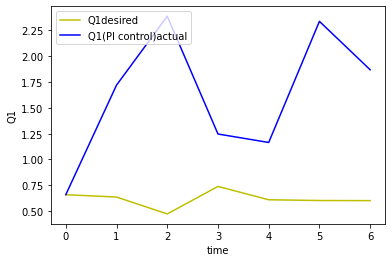

In [ ]:
 import sympy as sym
 import math as math
 from sympy import diff, sin, cos
 from scipy.integrate import odeint
 import scipy
 import scipy.integrate
 from scipy.integrate import solve_ivp
 import numpy as np
 import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
 E1=[]
 E2=[]
 E3=[]
 T=[]
 Q1=np.array([0.65874639, 0.63623502,
       0.47257178, 0.73894073, 0.60972479, 0.60245313, 0.60116773])
 Q2=np.array([0.51530277, 0.61126651,
       1.48927457, 0.18623433, 0.72758217, 0.76026321, 0.766080053])
 D4=np.array([0.83381924,  0.40524781,
       -0.18075802, -0.81924198, -1.40524781, -1.83381924, -2.])

 def Model(t, y):


    '''
    function for the ODE solver - returns dy/dt of states
    '''
    KP1=0.4
    KI1=0.8
    KP2=0.6
    KI2=5
    KP3=1.3
    KI3=8
    q1=y[0]
    q2=y[1]
    d4=y[2]
    q1dot=y[3]
    q2dot=y[4]
    d4dot=y[5]
    dq1dt=q1dot
    dq2dt=q2dot
    dzdt=d4dot
    
    T.append(t)
#proportional 
    n=round(t)
    if(t<=n+1):
      e1=(Q1[n-1]-q1)
      e2=(Q2[n-1]-q2)
      e3=(D4[n-1]-d4)
    else:
      n=n+1
      e1=(Q1[n]-q1)
      e2=(Q2[n]-q2)
      e3=(D4[n]-d4)
   
    E1.append(e1)
    E2.append(e2)
    E3.append(e3)
    s1=0
    s2=0
    s3=0
#integrator block
    if(t>2):
        for i in range(7):
            s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
            s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
            s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])

    T1=KP1*(e1)+KI1*(s1)
    #print(T1)
    T2=KP2*(e2)+KI2*(s2)
    F=KP3*(e3)+KI3*(s3)
   
    
    dq1ddt=(-F + q1dot*(q1dot*(-1.0*d4*math.sin(q1)**2 + 1.0*(d4*math.sin(q1)*math.cos(q1 - q2) + d4*math.sin(q1 - q2)*math.cos(q1))*math.sin(q2) + 25.0*math.sin(q1)*math.sin(q1 - q2)) + q2dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2))) + q2dot*(q1dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2)) + q2dot*(-1.0*d4 + 25.0*math.cos(q2))) + (1/2)*math.sin(q1))*(d4**3*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) - 50*d4**2*math.sin(q2) + 627*d4*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) - 1250*d4*math.sin(q2)*math.cos(q2) - 100*math.sin(q2))/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512) + (-T2 + d4dot*(q1dot*(0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 12.5*math.cos(q2)) + q2dot*(1.0*d4 + 25.0*math.cos(q2))) + q1dot*(d4dot*(0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 12.5*math.cos(q2)) + q1dot*(-25.0*d4*math.sin(q1)*math.cos(q1 - q2) + 1.0*(d4*math.cos(q2) + 25)*(d4*math.sin(q1)*math.cos(q1 - q2) + d4*math.sin(q1 - q2)*math.cos(q1)))) + q2dot*(-25.0*d4*q2dot*math.sin(q2) + d4dot*(1.0*d4 + 25.0*math.cos(q2))))*(3*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) - 50*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 75*d4*math.sin(q1)*math.sin(q1 - q2) - 75*d4*math.cos(q2) + 2500*math.sin(q2)**2 - 5625)/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512) + (-3*d4**2 - 150*d4*math.cos(q2) + 2500*math.sin(q2)**2 - 5631)*(-T1 + d4dot*(1.0*d4dot*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) + q1dot*(1.0*d4*math.sin(q1)**2 - 25.0*math.sin(q1)*math.sin(q1 - q2)) + q2dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 1.0*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.cos(q2) - 12.5*math.cos(q2))) + q1dot*(25.0*d4*q2dot*math.sin(q1)*math.cos(q1 - q2) + d4dot*(1.0*d4*math.sin(q1)**2 - 25.0*math.sin(q1)*math.sin(q1 - q2)) + q1dot*(1.0*d4**2*math.sin(q1)*math.cos(q1) - 25.0*d4*math.sin(q1)*math.cos(q1 - q2) - 25.0*d4*math.sin(q1 - q2)*math.cos(q1))) + q2dot*(25.0*d4*q1dot*math.sin(q1)*math.cos(q1 - q2) + d4dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 1.0*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.cos(q2) - 12.5*math.cos(q2)) + q2dot*(-1.0*d4*(d4*math.cos(q2) + 25)*math.sin(q1)*math.cos(q1 - q2) - 1.0*d4*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.sin(q2))) + ((1/2)*d4 + 37.5)*math.cos(q1) + 37.5*math.cos(q1))/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512)
    dq2ddt=(-F + q1dot*(q1dot*(-1.0*d4*math.sin(q1)**2 + 1.0*(d4*math.sin(q1)*math.cos(q1 - q2) + d4*math.sin(q1 - q2)*math.cos(q1))*math.sin(q2) + 25.0*math.sin(q1)*math.sin(q1 - q2)) + q2dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2))) + q2dot*(q1dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2)) + q2dot*(-1.0*d4 + 25.0*math.cos(q2))) + (1/2)*math.sin(q1))*(-d4**3*math.sin(q1)**2*math.sin(q2)*math.sin(q1 - q2)**2*math.cos(q2) - 25*d4**2*math.sin(q1)**2*math.sin(q2)*math.sin(q1 - q2)**2 + 50*d4**2*math.sin(q1)**2*math.sin(q2) + 75*d4**2*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2)*math.cos(q2) + 625*d4*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) - 1250*d4*math.sin(q2)*math.cos(q2) + 100*math.sin(q2))/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512) + (-T2 + d4dot*(q1dot*(0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 12.5*math.cos(q2)) + q2dot*(1.0*d4 + 25.0*math.cos(q2))) + q1dot*(d4dot*(0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 12.5*math.cos(q2)) + q1dot*(-25.0*d4*math.sin(q1)*math.cos(q1 - q2) + 1.0*(d4*math.cos(q2) + 25)*(d4*math.sin(q1)*math.cos(q1 - q2) + d4*math.sin(q1 - q2)*math.cos(q1)))) + q2dot*(-25.0*d4*q2dot*math.sin(q2) + d4dot*(1.0*d4 + 25.0*math.cos(q2))))*(d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 - 3*d4**2*math.sin(q1)**2 - 100*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 150*d4*math.sin(q1)*math.sin(q1 - q2) + 2500*math.sin(q2)**2 - 5631)/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512) + (-T1 + d4dot*(1.0*d4dot*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) + q1dot*(1.0*d4*math.sin(q1)**2 - 25.0*math.sin(q1)*math.sin(q1 - q2)) + q2dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 1.0*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.cos(q2) - 12.5*math.cos(q2))) + q1dot*(25.0*d4*q2dot*math.sin(q1)*math.cos(q1 - q2) + d4dot*(1.0*d4*math.sin(q1)**2 - 25.0*math.sin(q1)*math.sin(q1 - q2)) + q1dot*(1.0*d4**2*math.sin(q1)*math.cos(q1) - 25.0*d4*math.sin(q1)*math.cos(q1 - q2) - 25.0*d4*math.sin(q1 - q2)*math.cos(q1))) + q2dot*(25.0*d4*q1dot*math.sin(q1)*math.cos(q1 - q2) + d4dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 1.0*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.cos(q2) - 12.5*math.cos(q2)) + q2dot*(-1.0*d4*(d4*math.cos(q2) + 25)*math.sin(q1)*math.cos(q1 - q2) - 1.0*d4*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.sin(q2))) + ((1/2)*d4 + 37.5)*math.cos(q1) + 37.5*math.cos(q1))*(3*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) - 50*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 75*d4*math.sin(q1)*math.sin(q1 - q2) - 75*d4*math.cos(q2) + 2500*math.sin(q2)**2 - 5625)/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512)
    dzddt= (-F + q1dot*(q1dot*(-1.0*d4*math.sin(q1)**2 + 1.0*(d4*math.sin(q1)*math.cos(q1 - q2) + d4*math.sin(q1 - q2)*math.cos(q1))*math.sin(q2) + 25.0*math.sin(q1)*math.sin(q1 - q2)) + q2dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2))) + q2dot*(q1dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) - 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) - 12.5*math.cos(q2)) + q2dot*(-1.0*d4 + 25.0*math.cos(q2))) + (1/2)*math.sin(q1))*(d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - d4**4*math.sin(q1)**2 + 50*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 50*d4**3*math.sin(q1)**2*math.cos(q2) - 50*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 50*d4**3*math.sin(q1)*math.sin(q1 - q2) + 625*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 1877*d4**2*math.sin(q1)**2 - 2500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 625*d4**2*math.cos(q2)**2 - 1877*d4**2 + 100*d4*math.sin(q1)*math.sin(q1 - q2) - 100*d4*math.cos(q2) - 7504)/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512) + (-T2 + d4dot*(q1dot*(0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 12.5*math.cos(q2)) + q2dot*(1.0*d4 + 25.0*math.cos(q2))) + q1dot*(d4dot*(0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 12.5*math.cos(q2)) + q1dot*(-25.0*d4*math.sin(q1)*math.cos(q1 - q2) + 1.0*(d4*math.cos(q2) + 25)*(d4*math.sin(q1)*math.cos(q1 - q2) + d4*math.sin(q1 - q2)*math.cos(q1)))) + q2dot*(-25.0*d4*q2dot*math.sin(q2) + d4dot*(1.0*d4 + 25.0*math.cos(q2))))*(-d4**3*math.sin(q1)**2*math.sin(q2)*math.sin(q1 - q2)**2*math.cos(q2) - 25*d4**2*math.sin(q1)**2*math.sin(q2)*math.sin(q1 - q2)**2 + 50*d4**2*math.sin(q1)**2*math.sin(q2) + 75*d4**2*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2)*math.cos(q2) + 625*d4*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) - 1250*d4*math.sin(q2)*math.cos(q2) + 100*math.sin(q2))/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512) + (d4**3*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) - 50*d4**2*math.sin(q2) + 627*d4*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) - 1250*d4*math.sin(q2)*math.cos(q2) - 100*math.sin(q2))*(-T1 + d4dot*(1.0*d4dot*math.sin(q1)*math.sin(q2)*math.sin(q1 - q2) + q1dot*(1.0*d4*math.sin(q1)**2 - 25.0*math.sin(q1)*math.sin(q1 - q2)) + q2dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 1.0*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.cos(q2) - 12.5*math.cos(q2))) + q1dot*(25.0*d4*q2dot*math.sin(q1)*math.cos(q1 - q2) + d4dot*(1.0*d4*math.sin(q1)**2 - 25.0*math.sin(q1)*math.sin(q1 - q2)) + q1dot*(1.0*d4**2*math.sin(q1)*math.cos(q1) - 25.0*d4*math.sin(q1)*math.cos(q1 - q2) - 25.0*d4*math.sin(q1 - q2)*math.cos(q1))) + q2dot*(25.0*d4*q1dot*math.sin(q1)*math.cos(q1 - q2) + d4dot*(-0.5*d4*math.sin(q1)*math.sin(q2)*math.cos(q1 - q2) + 0.5*(d4*math.cos(q2) + 25)*math.sin(q1)*math.sin(q1 - q2) + 1.0*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.cos(q2) - 12.5*math.cos(q2)) + q2dot*(-1.0*d4*(d4*math.cos(q2) + 25)*math.sin(q1)*math.cos(q1 - q2) - 1.0*d4*(d4*math.sin(q1)*math.sin(q1 - q2) - 25)*math.sin(q2))) + ((1/2)*d4 + 37.5)*math.cos(q1) + 37.5*math.cos(q1))/(d4**4*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 3*d4**4*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2)**2 - 3*d4**4*math.sin(q1)**2 - 50*d4**3*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2*math.cos(q2) + 150*d4**3*math.sin(q1)**2*math.sin(q1 - q2)**2*math.cos(q2) - 150*d4**3*math.sin(q1)**2*math.cos(q2) - 100*d4**3*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) - 150*d4**3*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2)**2 + 150*d4**3*math.sin(q1)*math.sin(q1 - q2) - 623*d4**2*math.sin(q1)**2*math.sin(q2)**2*math.sin(q1 - q2)**2 + 2500*d4**2*math.sin(q1)**2*math.sin(q2)**2 + 1875*d4**2*math.sin(q1)**2*math.sin(q1 - q2)**2 - 5631*d4**2*math.sin(q1)**2 + 2500*d4**2*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2)*math.cos(q2) - 7500*d4**2*math.sin(q1)*math.sin(q1 - q2)*math.cos(q2) + 2500*d4**2*math.sin(q2)**2 + 1875*d4**2*math.cos(q2)**2 - 5631*d4**2 - 200*d4*math.sin(q1)*math.sin(q2)**2*math.sin(q1 - q2) + 300*d4*math.sin(q1)*math.sin(q1 - q2) - 300*d4*math.cos(q2) + 10000*math.sin(q2)**2 - 22512)
    dydt = [dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
    return dydt



initstate = [Q1[0],Q2[0],D4[0],0,0,0] # initial states
timestep = 0.1

time = np.linspace(0,7, 7) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
solution = solve_ivp(Model, [0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
D4n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
D4DOT=solution.y[5]
plt.plot(Q1,'y')
plt.plot(Q1n,'b')
plt.xlabel('time')
plt.ylabel('Q1')
plt.legend(["Q1desired", "Q1(PI control)actual"], loc ="upper left")


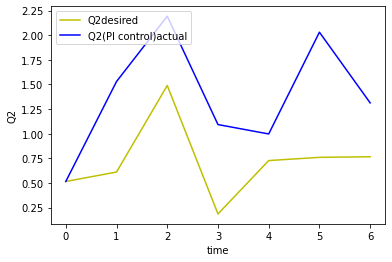

In [ ]:
plt.plot(Q2,'y')
plt.plot(Q2n,'b')
plt.xlabel('time')
plt.ylabel('Q2')
plt.legend(["Q2desired", "Q2(PI control)actual"], loc ="upper left")

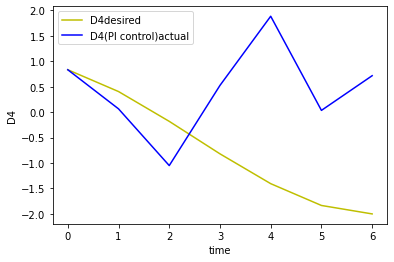

In [ ]:
plt.plot(D4,'y')
plt.plot(D4n,'b')
plt.xlabel('time')
plt.ylabel('D4')
plt.legend(["D4desired", "D4(PI control)actual"], loc ="upper left")

**DDOT-2C verification for it To be a Skew Symmetric Matrix**

In [ ]:
from sympy.physics.vector import dynamicsymbols
from sympy import diff, Symbol
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

m1g=1
m2g=1
m3g=1
i1=1
i2=1
GR=9.8
m4=1
l1=2
l2=2
#I1 0
#0 I2

sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F,mG,t= sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG t ')
q1, q2, d4= dynamicsymbols('q1,q2,d4')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([diff(q1,t),diff(q2,t),diff(d4,t)])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])

VQ=m1g*l1/2+m2g*(l1+l2/2)*sym.sin(q1)+m3g*(l1+l2/2+d4/2)*sym.sin(q1)
X1=sym.diff(VQ,q1)
X2=sym.diff(VQ,q2)
X3=sym.diff(VQ,d4)
GQ=sym.Matrix([X1,X2,X3])

tau=sym.Matrix([T1,T2,F])
#FOR KINETIC ENERGY CALCULATION
M=sym.Matrix([[-l2*sym.cos(q1),l1*sym.cos(q1),0],[-l2*sym.sin(q1),l1*sym.sin(q1),0],[0,0,1]]);
X=M.T
N=sym.Matrix([[-l2*sym.cos(q1),l1*sym.cos(q1),sym.sin(q2)*sym.cos(q1)],[-l2*sym.sin(q1),l1*sym.sin(q1),sym.sin(q1)*sym.sin(q2)],[0,0,sym.cos(q2)]]);
Y=N.T
O=sym.Matrix([[-d4*sym.sin(q1)*sym.sin(q2)-l2*sym.cos(q1),(d4*sym.cos(q2)+l1)*sym.cos(q1),sym.sin(q2)*sym.cos(q1)],[d4*sym.sin(q1)*sym.cos(q2)-l2*sym.sin(q1),(d4*sym.cos(q2)+l1)*sym.sin(q1),sym.sin(q1)*sym.sin(q2)],[0,-d4*sym.sin(q2),sym.cos(q2)]]);
Z=O.T
I=sym.Matrix([[i1,0,0],[0,i2,0],[0,0,0]])
#FOR ROTATIONAL ENERGY CALCULATION
M1=sym.Matrix([[-sym.sin(q1),0,0],[sym.cos(q1),0,0],[0,1,0]]);
X1=M1.T
N1=sym.Matrix([[-sym.sin(q1),sym.cos(q1)*sym.sin(q2),0],[sym.cos(q1),sym.sin(q1)*sym.sin(q2),0],[0,sym.cos(q2),0]]);
Y1=N1.T


DQ0=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)
DQ1=(sym.simplify(X1*M1)+sym.simplify(Y1*N1))*I
DQ=DQ0+DQ1


no1=3

CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=((-sym.diff(DQ[k,i],k1[j])+sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        

CQQD

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢(-(d₄(t)⋅cos(q₂(t)) + 2)⋅(d₄(t)⋅sin(q₁(t) - q₂(t))⋅cos(q₁(t)) + d₄(t)⋅sin(q₁(
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                           ((d₄(t)⋅cos(q₂(t)) + 2)⋅sin(q₁(t) 
⎣                                                                             

                                                                              
                                                   

**CQQD is The DDOT-2C Matrix**

In [ ]:
sym.simplify(CQQD)

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢    2                           d             2                           d  
⎢  d₄ (t)⋅sin(2⋅q₁(t) - 2⋅q₂(t))⋅──(q₁(t))   d₄ (t)⋅sin(2⋅q₁(t) - 2⋅q₂(t))⋅──(
⎢                                dt                                        dt 
⎢- ─────────────────────────────────────── - ─────────────────────────────────
⎢                     2                                         2             
⎢                                                                             
⎢                                                   

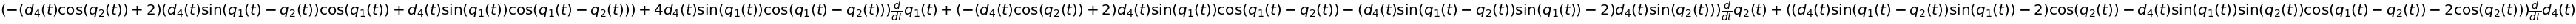

In [ ]:
CQQD[1,0]

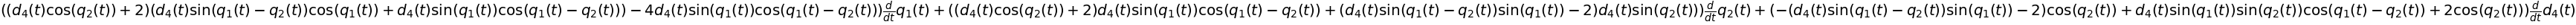

In [ ]:
CQQD[0,1]

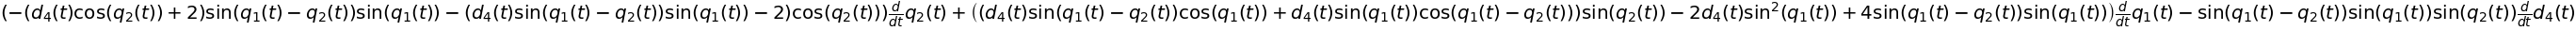

In [ ]:
CQQD[0,2]

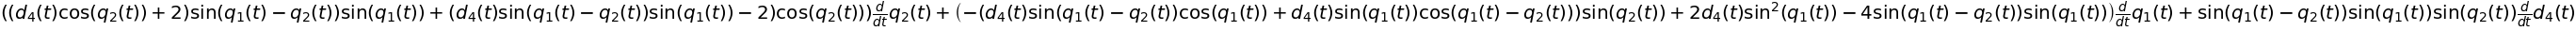

In [ ]:
CQQD[2,0]

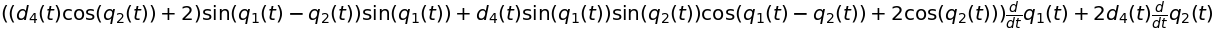

In [ ]:
CQQD[2,1]

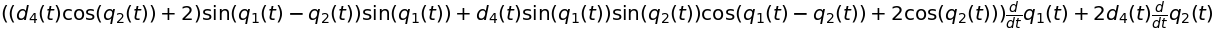

In [ ]:
CQQD[2,1]